<a href="https://colab.research.google.com/github/datagrad/1.ML/blob/main/HR_Attrition_Logistic_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Steps of Logistic Model Development


**Libraries**
```
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import statsmodels.formula.api as sm
```

1.   Import the dataset as df.

```
Fiber=pd.read_csv("https://raw.githubusercontent.com/venkatareddykonasani/Datasets/master/Fiberbits/Fiberbits_v1.csv")

Fiber.info()
```


2.   Analyse and identify the Target Variable.


```
Fiber[['active_cust']].value_counts()

```

3.   Change the Target Variable to Binary data.
```
hr_data['Attrition'] = hr_data['Attrition'].map({'Yes': 1, 'No': 0})
```

4.   Change other Categorical Variables to Binary data using OneHotEncoder.
```
from sklearn.preprocessing import OneHotEncoder
categorical_columns = hr_data.select_dtypes(include=['object']).columns
one_hot_encoder = OneHotEncoder(sparse=False, drop='first')
categorical_data_encoded = one_hot_encoder.fit_transform(hr_data[categorical_columns])
categorical_data_encoded_df = pd.DataFrame(categorical_data_encoded, columns=one_hot_encoder.get_feature_names_out(categorical_columns))
hr_data.drop(categorical_columns, axis=1, inplace=True)
hr_data = pd.concat([hr_data, categorical_data_encoded_df], axis=1)
```




5.   assign the y = Target_Variable and X = independent_Variables

```
y = Fiber[['active_cust']]
X = Fiber.drop('active_cust', axis=1)
```
5.   Split the data into train & test: X_train, X_test, y_train, y_test

```
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

```


6.   Scale the X_train, X_test using StandardScaler to X_train_scaled & X_test_scaled

```
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
```


7.   Fit the X_train_scaled to logistic model

```
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()

logistic.fit(X_train_scaled, y_train)

```


8.   Check the Confusion_Matrix and Accuracy of the model:
```
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
```

> *   	Create predictions for X_test_scaled
```
predictions = logistic.predict(X_test_scaled)
prediction_probabilities = logistic.predict_proba(X_test_scaled)[:, 1]
```

> *   	confusion_matrix(y_test, predictions)
```
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", conf_matrix)
```

> *   	accuracy_score(y_test, predictions)
```
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)
```

> *   	precision_score(y_test, predictions, pos_label=1)
```
precision = precision_score(y_test, predictions, pos_label=1)
print("Precision:", precision)
```

> *   	recall_score(y_test, predictions, pos_label=1)
```
recall = recall_score(y_test, predictions, pos_label=1)
print("Recall:", recall)
```

> *   	f1_score(y_test, predictions, pos_label=1)
```
f1 = f1_score(y_test, predictions, pos_label=1)
print("F1 Score:", f1)
```

> *   	roc_auc = auc(fpr, tpr)
```
fpr, tpr, thresholds = roc_curve(y_test, prediction_probabilities)
roc_auc = auc(fpr, tpr)
```
```
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC Curve)')
plt.legend(loc="lower right")
plt.show()
```

9.   Model Tuning based on VIF score:
> * Modular Code:
```
import statsmodels.formula.api as sm
def vif_cal(input_data, dependent_col):
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]]
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)
```
> * VIF score Check and drop Code Code:
```
vif_cal(input_data=hr_data, dependent_col="Attrition")
```
> * VIF score Check and drop variable Code (drop variable with Maximum value if more than 5):
```
columns_to_drop = [,'JobLevel','EmployeeCount','StandardHours']
vif_cal(input_data=hr_data.drop(columns_to_drop, axis=1), dependent_col="Attrition")
```

## 1.Import data and libraries (MODULAR)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url = 'https://raw.githubusercontent.com/datagrad/DataScience-Projects/main/HR-Employee-Attrition.csv'
hr_data = pd.read_csv(url)
hr_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

## 2.Identify Target Variable and convert it to binary

In [4]:
hr_data.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [5]:
hr_data['Attrition'] = hr_data['Attrition'].map({'Yes': 1, 'No': 0})

## 3.Convert Categorical Variables using OneHotEncoder (MODULAR)

In [6]:
from sklearn.preprocessing import OneHotEncoder


# One-hot encode the categorical variables
categorical_columns = hr_data.select_dtypes(include=['object']).columns
one_hot_encoder = OneHotEncoder(sparse=False, drop='first')
categorical_data_encoded = one_hot_encoder.fit_transform(hr_data[categorical_columns])

# Create a DataFrame with the encoded variables
categorical_data_encoded_df = pd.DataFrame(categorical_data_encoded, columns=one_hot_encoder.get_feature_names_out(categorical_columns))


# Drop the original categorical columns and concatenate the encoded DataFrame
hr_data.drop(categorical_columns, axis=1, inplace=True)
hr_data = pd.concat([hr_data, categorical_data_encoded_df], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [7]:
hr_data

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1,1102,1,2,1,1,2,94,3,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1,49,0,279,8,1,1,2,3,61,2,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,37,1,1373,2,2,1,4,4,92,2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,33,0,1392,3,4,1,5,4,56,3,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,27,0,591,2,1,1,7,1,40,3,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,1,2061,3,41,4,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1466,39,0,613,6,1,1,2062,4,42,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1467,27,0,155,4,3,1,2064,2,87,4,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1468,49,0,1023,2,3,1,2065,4,63,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


## 3.5. Multicollinearity check between predictors using VIF

### VIF calculation Code (MODULAR)

In [8]:
import statsmodels.formula.api as sm
def vif_cal(input_data, dependent_col):
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]]
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

### VIF calculation for variables and droping the High VIF predictor

In [9]:
vif_cal(input_data=hr_data, dependent_col="Attrition")

Age  VIF =  2.08
DailyRate  VIF =  1.04
DistanceFromHome  VIF =  1.02
Education  VIF =  1.09
EmployeeCount  VIF =  0.0
EmployeeNumber  VIF =  1.04
EnvironmentSatisfaction  VIF =  1.03
HourlyRate  VIF =  1.03
JobInvolvement  VIF =  1.03
JobLevel  VIF =  14.16
JobSatisfaction  VIF =  1.03
MonthlyIncome  VIF =  18.15


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


MonthlyRate  VIF =  1.02
NumCompaniesWorked  VIF =  1.28
PercentSalaryHike  VIF =  2.56
PerformanceRating  VIF =  2.55
RelationshipSatisfaction  VIF =  1.03
StandardHours  VIF =  0.0
StockOptionLevel  VIF =  1.92
TotalWorkingYears  VIF =  5.01
TrainingTimesLastYear  VIF =  1.04
WorkLifeBalance  VIF =  1.03
YearsAtCompany  VIF =  4.75


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


YearsInCurrentRole  VIF =  2.8
YearsSinceLastPromotion  VIF =  1.72
YearsWithCurrManager  VIF =  2.85
BusinessTravel_Travel_Frequently  VIF =  2.37
BusinessTravel_Travel_Rarely  VIF =  2.38
Department_Research & Development  VIF =  44.05
Department_Sales  VIF =  43.96
EducationField_Life Sciences  VIF =  24.12
EducationField_Marketing  VIF =  10.9
EducationField_Medical  VIF =  21.67
EducationField_Other  VIF =  6.05
EducationField_Technical Degree  VIF =  8.87
Gender_Male  VIF =  1.03
JobRole_Human Resources  VIF =  7.26
JobRole_Laboratory Technician  VIF =  3.3
JobRole_Manager  VIF =  4.23
JobRole_Manufacturing Director  VIF =  1.94
JobRole_Research Director  VIF =  2.68
JobRole_Research Scientist  VIF =  3.54
JobRole_Sales Executive  VIF =  14.7
JobRole_Sales Representative  VIF =  5.6
MaritalStatus_Married  VIF =  1.86
MaritalStatus_Single  VIF =  3.05
OverTime_Yes  VIF =  1.04


In [10]:
# List of columns to drop
columns_to_drop = ['Department_Research & Development','EducationField_Life Sciences','MonthlyIncome','Department_Sales','JobLevel'
    ]

# Drop multiple columns in one line
vif_cal(input_data=hr_data.drop(columns_to_drop, axis=1), dependent_col="Attrition")


Age  VIF =  2.08
DailyRate  VIF =  1.04
DistanceFromHome  VIF =  1.02
Education  VIF =  1.08
EmployeeCount  VIF =  0.0
EmployeeNumber  VIF =  1.03
EnvironmentSatisfaction  VIF =  1.03
HourlyRate  VIF =  1.02
JobInvolvement  VIF =  1.03
JobSatisfaction  VIF =  1.03
MonthlyRate  VIF =  1.02
NumCompaniesWorked  VIF =  1.28


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


PercentSalaryHike  VIF =  2.56
PerformanceRating  VIF =  2.54
RelationshipSatisfaction  VIF =  1.03
StandardHours  VIF =  0.0
StockOptionLevel  VIF =  1.92
TotalWorkingYears  VIF =  3.96
TrainingTimesLastYear  VIF =  1.04
WorkLifeBalance  VIF =  1.03
YearsAtCompany  VIF =  4.69
YearsInCurrentRole  VIF =  2.78
YearsSinceLastPromotion  VIF =  1.7
YearsWithCurrManager  VIF =  2.83
BusinessTravel_Travel_Frequently  VIF =  2.36
BusinessTravel_Travel_Rarely  VIF =  2.37
EducationField_Marketing  VIF =  1.49
EducationField_Medical  VIF =  1.22
EducationField_Other  VIF =  1.09
EducationField_Technical Degree  VIF =  1.12
Gender_Male  VIF =  1.03
JobRole_Human Resources  VIF =  1.42
JobRole_Laboratory Technician  VIF =  2.67
JobRole_Manager  VIF =  1.94
JobRole_Manufacturing Director  VIF =  1.94
JobRole_Research Director  VIF =  1.64
JobRole_Research Scientist  VIF =  2.81
JobRole_Sales Executive  VIF =  3.15
JobRole_Sales Representative  VIF =  1.79
MaritalStatus_Married  VIF =  1.86
Marital

## 4.X and y marking as Target and Dependent Variables

In [11]:
y = hr_data[['Attrition']]
X = hr_data.drop('Attrition', axis = 1)
X = X.drop(columns_to_drop, axis=1)


In [12]:
X.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobSatisfaction', 'MonthlyRate',
       'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
  

## 5.Train Test Split  (MODULAR)

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2, random_state = 35, shuffle=True)

# It's a good practice to reset the indices after train-test split if any row-wise operation was performed
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

## 6.Scaler Transformation for dependent Variables  (MODULAR)

In [14]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

## 7.Fitting the logistic Regression Model  (MODULAR)

In [15]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(X_train_scaled,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

## 8.Checking the prediction of the model  (MODULAR)

In [16]:
logistic.predict(X_test_scaled)

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

## 9.Confusion_Matrix and Accuracy of the model:  (MODULAR)

Confusion Matrix:
 [[245  11]
 [ 21  17]]
Accuracy: 0.891156462585034
Precision: 0.6071428571428571
Recall: 0.4473684210526316
F1 Score: 0.5151515151515151


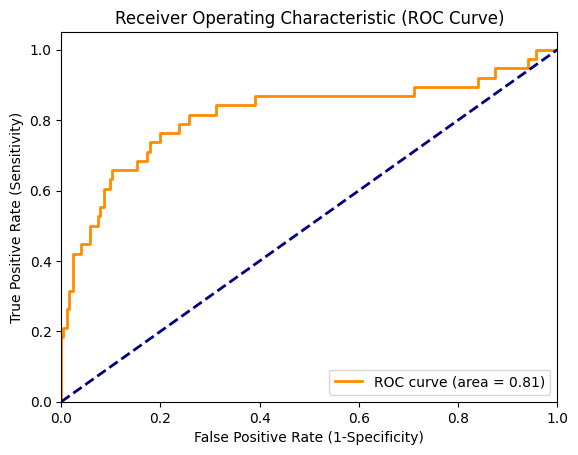

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt


# Making predictions on the scaled test set
predictions = logistic.predict(X_test_scaled)
prediction_probabilities = logistic.predict_proba(X_test_scaled)[:, 1]

# Confusion Matrix : Provides a detailed breakdown of correct and incorrect classifications for each class, helping identify if the model is confusing two classes.
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", conf_matrix)

# Accuracy : Measures the proportion of total correct predictions — useful as an overall metric but can be misleading for imbalanced classes.
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Precision : Indicates the reliability of the model's positive predictions. High precision means low false positives — important when the cost of false positives is high.
precision = precision_score(y_test, predictions, pos_label=1)
print("Precision:", precision)

# Recall : Measures the model's ability to detect positive instances. High recall means low false negatives — crucial when it's important to capture as many positives as possible.
recall = recall_score(y_test, predictions, pos_label=1)
print("Recall:", recall)

# F1 Score : Balances precision and recall, providing a single metric to assess the model's performance when you need a balance between precision and recall.
f1 = f1_score(y_test, predictions, pos_label=1)
print("F1 Score:", f1)

# ROC Curve and AUC : The curve helps visualize the trade-off between the true positive rate and false positive rate at various thresholds.
# AUC summarizes the ROC curve into a single value, with higher values indicating better model performance, especially useful for comparing models.
fpr, tpr, thresholds = roc_curve(y_test, prediction_probabilities)
roc_auc = auc(fpr, tpr)

# Plotting ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC Curve)')
plt.legend(loc="lower right")
plt.show()


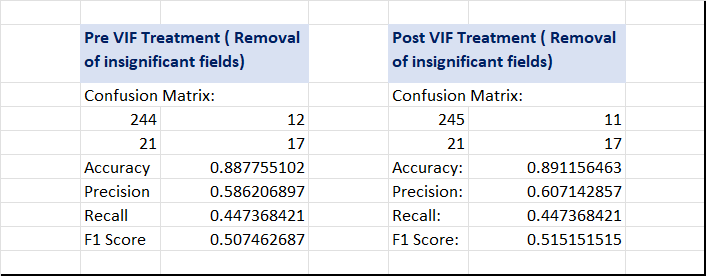

## Fresh Model using statsmodels for P-Value Check (Significance of Predictor check)

In [18]:
# Re-importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load the dataset
url = 'https://raw.githubusercontent.com/datagrad/DataScience-Projects/main/HR-Employee-Attrition.csv'

hr_data = pd.read_csv(url)

# Convert 'Attrition' to binary
hr_data['Attrition'] = hr_data['Attrition'].map({'Yes': 1, 'No': 0})

# Encode categorical variables
categorical_columns = hr_data.select_dtypes(include=['object']).columns
one_hot_encoder = OneHotEncoder(sparse=False, drop='first')
categorical_data_encoded = one_hot_encoder.fit_transform(hr_data[categorical_columns])
categorical_data_encoded_df = pd.DataFrame(categorical_data_encoded, columns=one_hot_encoder.get_feature_names_out(categorical_columns))

# Combine encoded categorical data with numerical data
hr_data.drop(categorical_columns, axis=1, inplace=True)
hr_data_encoded = pd.concat([hr_data, categorical_data_encoded_df], axis=1)

# Define X and y
X = hr_data_encoded.drop('Attrition', axis=1)
y = hr_data_encoded['Attrition']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Add a constant to the scaled data
X_train_scaled_const = sm.add_constant(X_train_scaled_df)

# Check and Remove Multicollinearity (VIF)
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    return vif_data.sort_values(by="VIF", ascending=False)

vif_data = calculate_vif(X_train_scaled_df)


# Identify features with VIF > 10 or where VIF is NaN
high_vif_features = vif_data[(vif_data['VIF'] > 5) | (vif_data['VIF'].isnull())]['Feature'].tolist()

# Drop identified features from the dataset
X_train_scaled_const_vif = X_train_scaled_const.drop(columns=high_vif_features, errors='ignore')

# Fit the model with statsmodels
model = sm.Logit(y_train.reset_index(drop=True), X_train_scaled_const_vif)
result = model.fit()

# Print the model summary
print(result.summary())


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Optimization terminated successfully.
         Current function value: 0.302509
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                 1176
Model:                          Logit   Df Residuals:                     1142
Method:                           MLE   Df Model:                           33
Date:                Sun, 25 Feb 2024   Pseudo R-squ.:                  0.3346
Time:                        04:02:47   Log-Likelihood:                -355.75
converged:                       True   LL-Null:                       -534.66
Covariance Type:            nonrobust   LLR p-value:                 3.467e-56
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -2.5932      0.153    -16.96

In [19]:
summary = result.summary2().tables[1]  # Get the summary table as a DataFrame
variables_to_drop = summary[summary['P>|z|'] > 0.05].index.tolist()
X_train_reduced = X_train_scaled_const_vif.drop(columns=variables_to_drop, errors='ignore')

model_reduced = sm.Logit(y_train.reset_index(drop=True), X_train_reduced)
result_reduced = model_reduced.fit()

# Print the summary of the reduced model
print(result_reduced.summary())

Optimization terminated successfully.
         Current function value: 0.308893
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                 1176
Model:                          Logit   Df Residuals:                     1155
Method:                           MLE   Df Model:                           20
Date:                Sun, 25 Feb 2024   Pseudo R-squ.:                  0.3206
Time:                        04:02:47   Log-Likelihood:                -363.26
converged:                       True   LL-Null:                       -534.66
Covariance Type:            nonrobust   LLR p-value:                 1.350e-60
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -2.5233      0.147    -17.22

In [20]:
summary_2 = result_reduced.summary2().tables[1]  # Get the summary table as a DataFrame
variables_to_drop_2 = summary[summary['P>|z|'] > 0.045].index.tolist()
variables_to_drop = variables_to_drop + variables_to_drop_2

X_train_reduced = X_train_scaled_const_vif.drop(columns=variables_to_drop, errors='ignore')

model_reduced = sm.Logit(y_train.reset_index(drop=True), X_train_reduced)
result_reduced_1 = model_reduced.fit()

# Print the summary of the reduced model
print(result_reduced_1.summary())

Optimization terminated successfully.
         Current function value: 0.308893
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                 1176
Model:                          Logit   Df Residuals:                     1155
Method:                           MLE   Df Model:                           20
Date:                Sun, 25 Feb 2024   Pseudo R-squ.:                  0.3206
Time:                        04:02:47   Log-Likelihood:                -363.26
converged:                       True   LL-Null:                       -534.66
Covariance Type:            nonrobust   LLR p-value:                 1.350e-60
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -2.5233      0.147    -17.22

In [21]:
result_reduced_1.summary2().tables[1].index.tolist()

['const',
 'DistanceFromHome',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobSatisfaction',
 'NumCompaniesWorked',
 'RelationshipSatisfaction',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'BusinessTravel_Travel_Frequently',
 'BusinessTravel_Travel_Rarely',
 'Gender_Male',
 'JobRole_Manufacturing Director',
 'JobRole_Research Director',
 'JobRole_Research Scientist',
 'MaritalStatus_Single',
 'OverTime_Yes']

## Rebuild the Sklearn Model using the only identified variables fro p-Value

In [22]:
# List of columns to retain in
y

columns_to_retain = [
    'DistanceFromHome',
    'EnvironmentSatisfaction',
    'JobInvolvement',
    'JobSatisfaction',
    'NumCompaniesWorked',
    'RelationshipSatisfaction',
    'TotalWorkingYears',
    'TrainingTimesLastYear',
    'WorkLifeBalance',
    'YearsInCurrentRole',
    'YearsSinceLastPromotion',
    'YearsWithCurrManager',
    'BusinessTravel_Travel_Frequently',
    'BusinessTravel_Travel_Rarely',
    'Gender_Male',
    'JobRole_Manufacturing Director',
    'JobRole_Research Director',
    'JobRole_Research Scientist',
    'MaritalStatus_Single',
    'OverTime_Yes'
]

# Select only the specified columns from X
X = X[columns_to_retain]



### 5.Train Test Split  (MODULAR)

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2, random_state = 35, shuffle=True)

# It's a good practice to reset the indices after train-test split if any row-wise operation was performed
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

### 6.Scaler Transformation for dependent Variables  (MODULAR)

In [24]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

### 7.Fitting the logistic Regression Model  (MODULAR)

In [25]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(X_train_scaled,y_train)


LogisticRegression()

### 8.Checking the prediction of the model  (MODULAR)

In [26]:
logistic.predict(X_test_scaled)

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0])

### 9.Confusion_Matrix and Accuracy of the model:  (MODULAR)

Confusion Matrix:
 [[250   6]
 [ 22  16]]
Accuracy: 0.9047619047619048
Precision: 0.7272727272727273
Recall: 0.42105263157894735
F1 Score: 0.5333333333333333


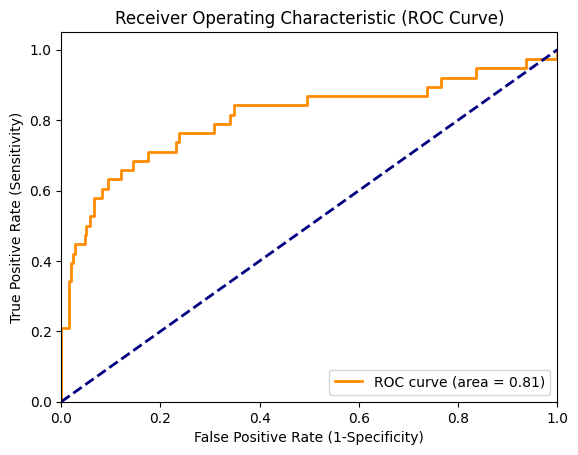

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt


# Making predictions on the scaled test set
predictions = logistic.predict(X_test_scaled)
prediction_probabilities = logistic.predict_proba(X_test_scaled)[:, 1]

# Confusion Matrix : Provides a detailed breakdown of correct and incorrect classifications for each class, helping identify if the model is confusing two classes.
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", conf_matrix)

# Accuracy : Measures the proportion of total correct predictions — useful as an overall metric but can be misleading for imbalanced classes.
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Precision : Indicates the reliability of the model's positive predictions. High precision means low false positives — important when the cost of false positives is high.
precision = precision_score(y_test, predictions, pos_label=1)
print("Precision:", precision)

# Recall : Measures the model's ability to detect positive instances. High recall means low false negatives — crucial when it's important to capture as many positives as possible.
recall = recall_score(y_test, predictions, pos_label=1)
print("Recall:", recall)

# F1 Score : Balances precision and recall, providing a single metric to assess the model's performance when you need a balance between precision and recall.
f1 = f1_score(y_test, predictions, pos_label=1)
print("F1 Score:", f1)

# ROC Curve and AUC : The curve helps visualize the trade-off between the true positive rate and false positive rate at various thresholds.
# AUC summarizes the ROC curve into a single value, with higher values indicating better model performance, especially useful for comparing models.
fpr, tpr, thresholds = roc_curve(y_test, prediction_probabilities)
roc_auc = auc(fpr, tpr)

# Plotting ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC Curve)')
plt.legend(loc="lower right")
plt.show()
